Learned Parameters
mu     = 25.804091267939096
lambda = 0.0014593812811420303
c      = 0.021553085382354755


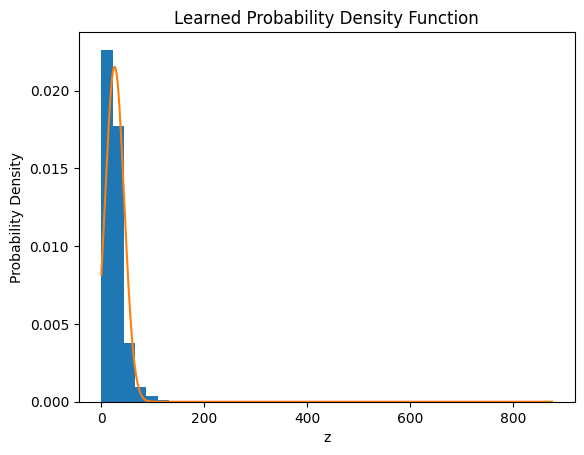

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("data 3.csv", encoding="latin1", low_memory=False)

# clean column names
df.columns = df.columns.str.strip()

# find NO2 column
for col in df.columns:
    if "NO2" in col.upper():
        no2_col = col
        break

x = df[no2_col].dropna().values

# roll number
r = 102353017

a = 0.05 * (r % 7)
b = 0.3 * ((r % 5) + 1)

# transformation
z = x + a * np.sin(b * x)

# parameter estimation
mu = np.mean(z)
var = np.mean((z - mu) ** 2)

lam = 1 / (2 * var)
c = np.sqrt(lam / np.pi)

print("Learned Parameters")
print("mu     =", mu)
print("lambda =", lam)
print("c      =", c)

# plot
z_vals = np.linspace(z.min(), z.max(), 500)
pdf = c * np.exp(-lam * (z_vals - mu) ** 2)

plt.hist(z, bins=40, density=True)
plt.plot(z_vals, pdf)
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Learned Probability Density Function")
plt.show()